In [16]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/CMPE255_Assignment6/F/synthetic_time_series_data.csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
data_info = data.info()
data_head = data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       1000 non-null   int64  
 1   Feature_1  1000 non-null   float64
 2   Feature_2  1000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


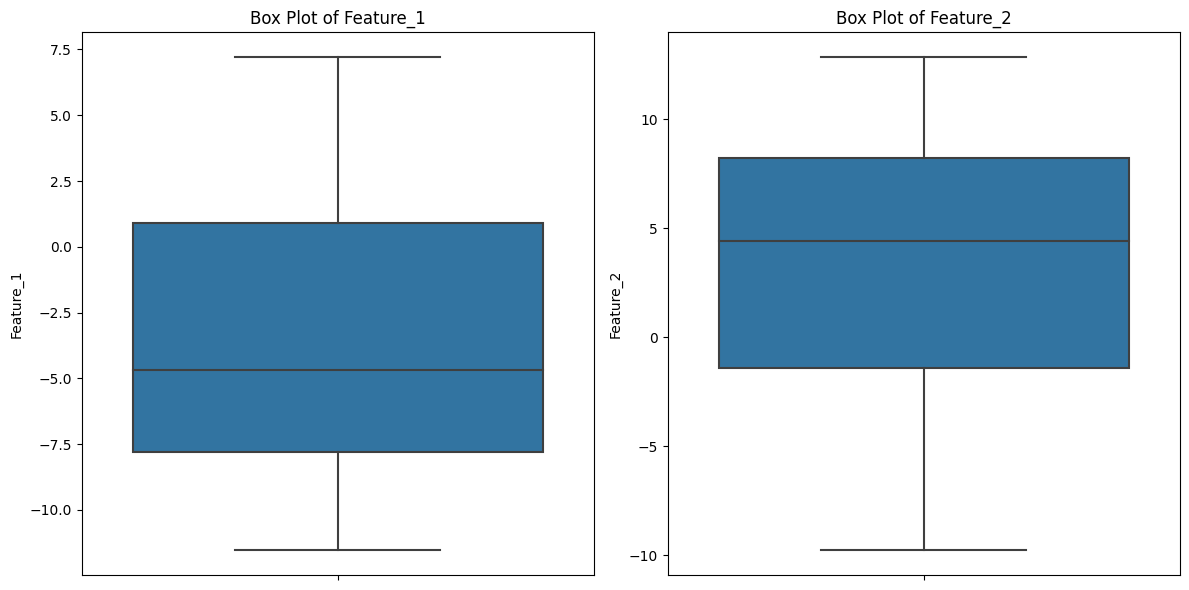

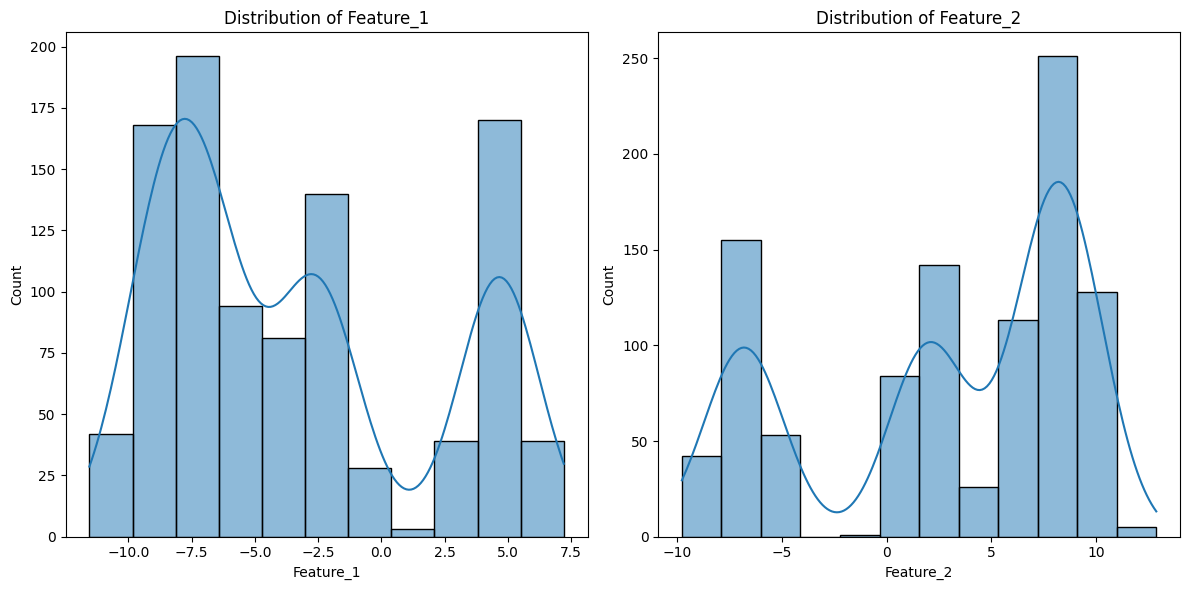

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Checking for outliers using box plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=data['Feature_1'])
plt.title('Box Plot of Feature_1')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['Feature_2'])
plt.title('Box Plot of Feature_2')

plt.tight_layout()
plt.show()

# Checking the distribution of the features
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Feature_1'], kde=True)
plt.title('Distribution of Feature_1')

plt.subplot(1, 2, 2)
sns.histplot(data['Feature_2'], kde=True)
plt.title('Distribution of Feature_2')

plt.tight_layout()
plt.show()

from sklearn.preprocessing import StandardScaler

# Normalizing the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data[['Feature_1', 'Feature_2']])

# Converting the normalized data back to a DataFrame for ease of use
normalized_df = pd.DataFrame(normalized_data, columns=['Feature_1', 'Feature_2'])


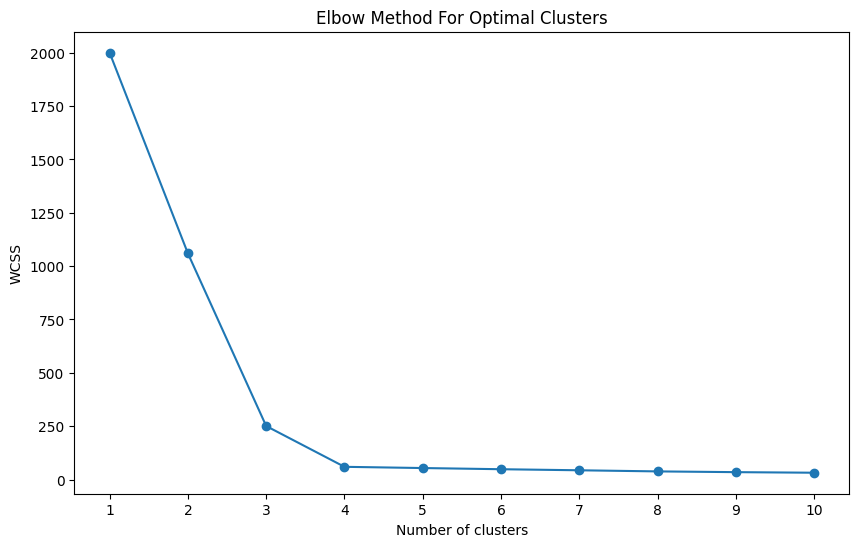

In [18]:
from sklearn.cluster import KMeans
import numpy as np

# Using the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(normalized_df)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.show()


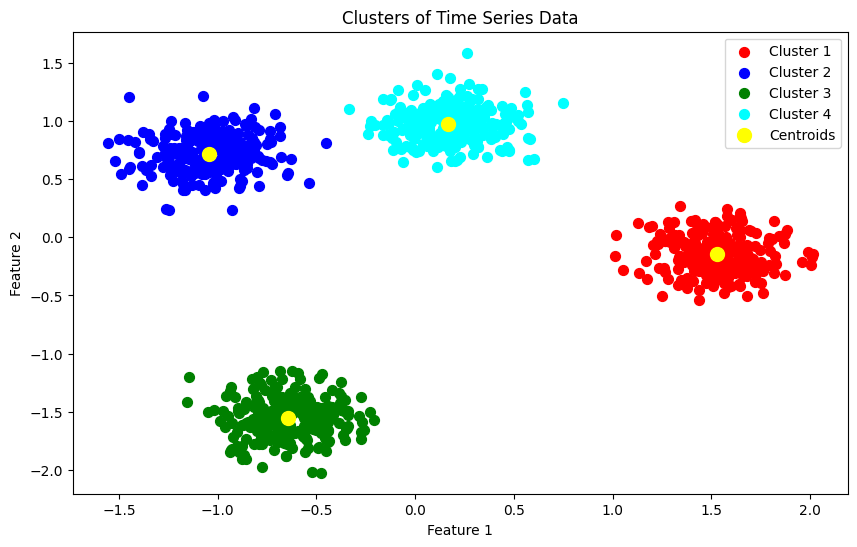

In [19]:
# Applying K-Means with the determined number of clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(normalized_df)

# Adding the cluster labels to our dataframe
normalized_df['Cluster'] = cluster_labels

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(normalized_df['Feature_1'][normalized_df['Cluster'] == 0], normalized_df['Feature_2'][normalized_df['Cluster'] == 0], s=50, c='red', label='Cluster 1')
plt.scatter(normalized_df['Feature_1'][normalized_df['Cluster'] == 1], normalized_df['Feature_2'][normalized_df['Cluster'] == 1], s=50, c='blue', label='Cluster 2')
plt.scatter(normalized_df['Feature_1'][normalized_df['Cluster'] == 2], normalized_df['Feature_2'][normalized_df['Cluster'] == 2], s=50, c='green', label='Cluster 3')
plt.scatter(normalized_df['Feature_1'][normalized_df['Cluster'] == 3], normalized_df['Feature_2'][normalized_df['Cluster'] == 3], s=50, c='cyan', label='Cluster 4')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')

plt.title('Clusters of Time Series Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [20]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the K-Means clustering
silhouette_avg = silhouette_score(normalized_df[['Feature_1', 'Feature_2']], cluster_labels)
silhouette_avg


0.7982504226478482

In [21]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(normalized_df[['Feature_1', 'Feature_2']])

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)

# Calculate the silhouette score for DBSCAN clustering (excluding noise points)
dbscan_silhouette_avg = silhouette_score(normalized_df[['Feature_1', 'Feature_2']], dbscan_labels) if n_clusters_ > 1 else "Undefined"

n_clusters_, n_noise_, dbscan_silhouette_avg


(3, 0, 0.73768059795027)